In [ ]:
#!df -h
#!cat /proc/cpuinfo
#!cat /proc/meminfo.


DPI = 300

#Valori in cm
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

#impostazione della dimesione dei font
#plt.rcParams.update({'font.size': 8})

#np.random.seed(10)

#import e gloabals e funzioni
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import Generator, PCG64
%matplotlib inline

In [ ]:
%pip install mlxtend --upgrade

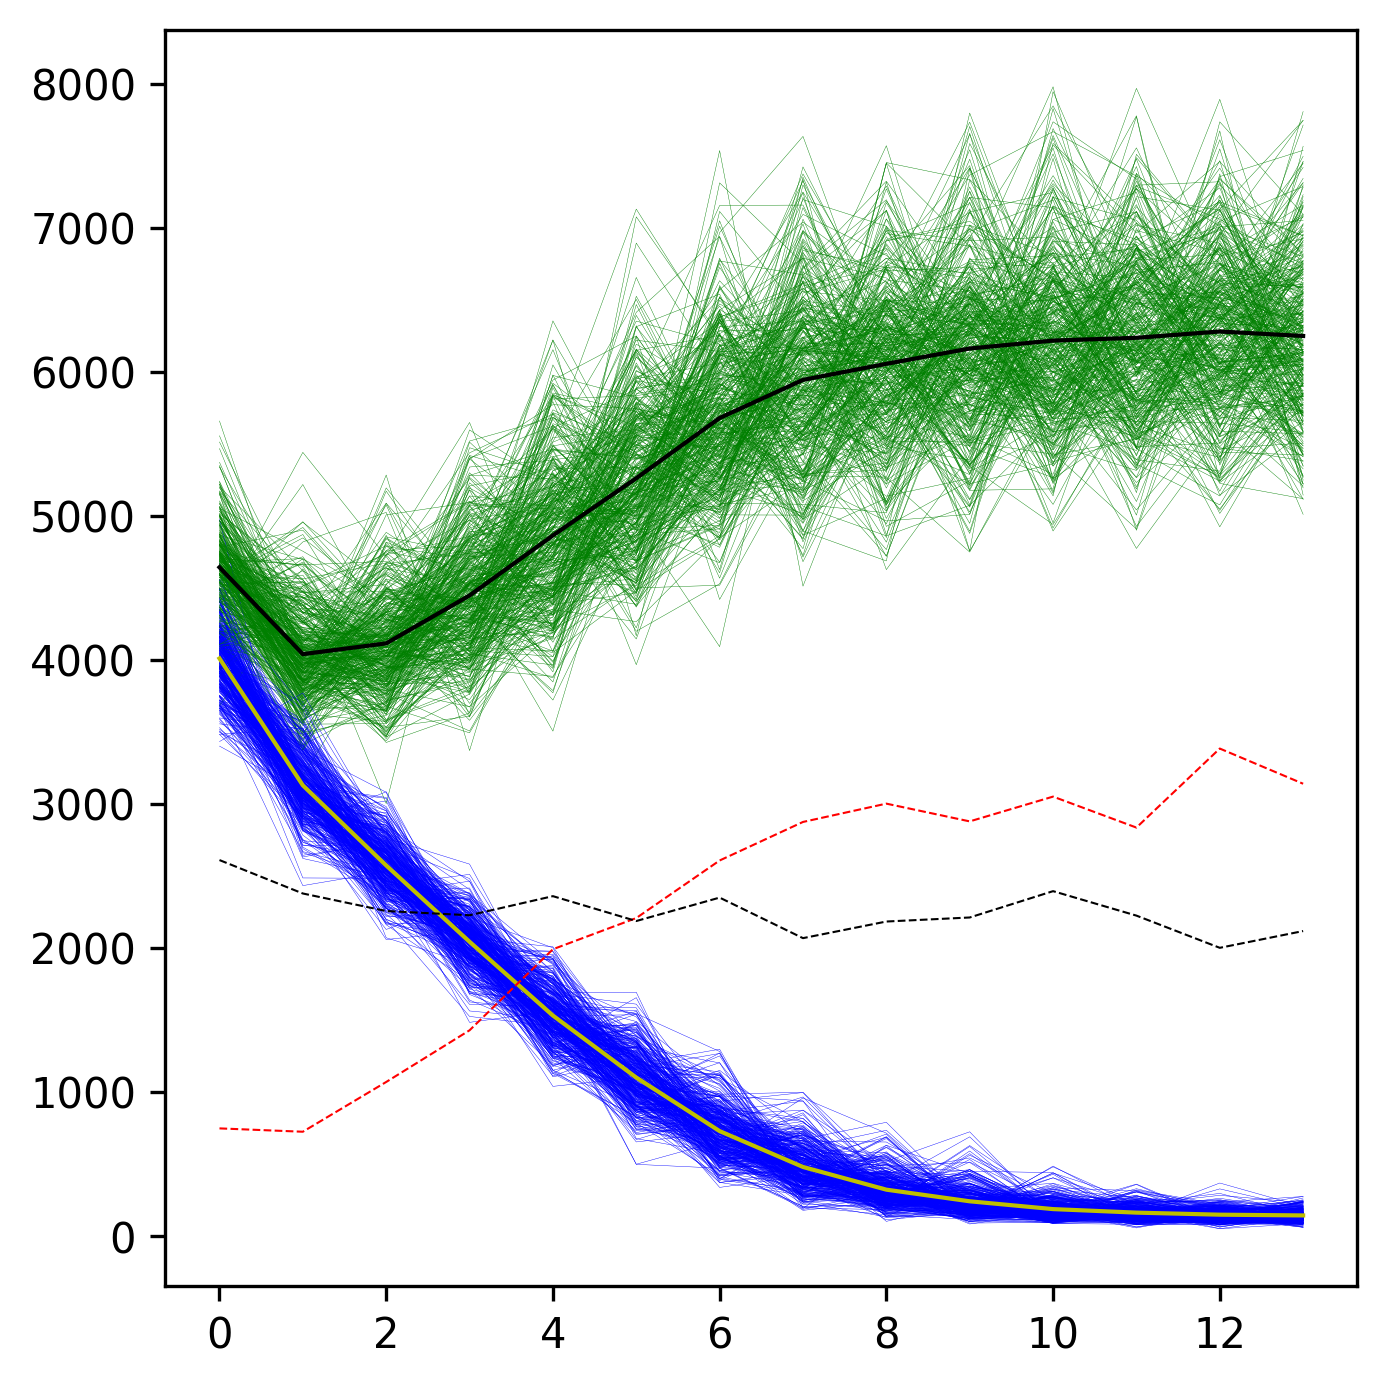

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from mlxtend.evaluate import bias_variance_decomp

diabetes = datasets.load_diabetes()
X = diabetes.data
Y = diabetes.target

#X = np.random.uniform(-4,4, 1000)
#Y = 0.8 * X**2 - X + 0.01 * X**3 - 10 + np.random.normal(1, 5, 1000)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler

def gen_models_mse():
  n = 15
  train = []
  test = []
  for i in range(1,n,1):   
    x, x_test, y, y_test = train_test_split(X, Y, test_size = 0.50, shuffle=True)
    model = DecisionTreeRegressor(criterion='mse', max_depth=i, min_samples_split=4) 
    model.fit(x,y)
    preds = model.predict(x_test)    
    mse_test = mse(y_test, preds)
    mse_train = mse(y, model.predict(x)) 
    test.append(mse_test)  
    train.append(mse_train)
  return test, train

def get_bias_variance():
  n = 15
  bias = []
  variance = []
  for i in range(1,n,1):   
    x, x_test, y, y_test = train_test_split(X, Y, test_size = 0.50, shuffle=True)
    model = DecisionTreeRegressor(criterion='mse', max_depth=i, min_samples_split=4)  
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, x, y, x_test, y_test, num_rounds = N, loss='mse')
    bias.append(avg_bias**0.95)  
    variance.append(avg_var)
  return bias, variance


def calc_std(mean, samples):
  var = 0
  for sample in samples:
    var = var + (mean - sample)**2
  return var/len(samples)

def plot_models_mse(n):
  test_mean = []
  train_mean = []
  for i in range(n):   
    test, train = gen_models_mse() 
    #print(test, train)   
    ax.plot(test, "g-", linewidth=0.1)
    test_mean.append(test)   
    train_mean.append(train)    
    ax.plot(train, "b-", linewidth=0.1)
  t_mean = np.average(test_mean, axis=0)
  tr_mean = np.average(train_mean, axis=0)
  t_std = np.std(test_mean, axis=0)
  tr_std = np.std(train_mean, axis=0)
  ax.plot(t_mean, "k-", linewidth=1)
  ax.plot(tr_mean, "y-", linewidth=1)
  bias, var = get_bias_variance()   
  ax.plot(var, "r--", linewidth=0.5)
  ax.plot(bias, "k--", linewidth=0.5)  
  
N = 400
fs=(cm2inch(12,12))
fig, ax=plt.subplots(figsize=fs, dpi=DPI, nrows=1, ncols=1, tight_layout=True)
plot_models_mse(N)
fig.savefig('5.1.png')

Grado polinomio 1
MSE addestramento e validazione
32.13831384694901 1240.3547128282069
AIC e BIC
526.5073344262307 535.5392403085195
Grado polinomio 2
MSE addestramento e validazione
0.953639651604882 1.1409863591726617
AIC e BIC
0.8795896138969077 12.92213079028193
Grado polinomio 3
MSE addestramento e validazione
0.9497729165077257 2.8646998153186756
AIC e BIC
2.2701462675915707 17.323322738072847
Grado polinomio 4
MSE addestramento e validazione
0.9431558165487053 24.497034599348073
AIC e BIC
3.2214337412750726 21.285245505852608
Grado polinomio 5
MSE addestramento e validazione
0.9413733854123025 102.85833850159653
AIC e BIC
4.937686745039926 26.012133803713716
Grado polinomio 6
MSE addestramento e validazione
0.927979620284136 6751.186638197695
AIC e BIC
4.788173899330593 28.87325625210064
Grado polinomio 7
MSE addestramento e validazione
0.9277973429704605 7819.701323490256
AIC e BIC
6.75870743037377 33.854425077240066
Grado polinomio 8
MSE addestramento e validazione
0.923365604

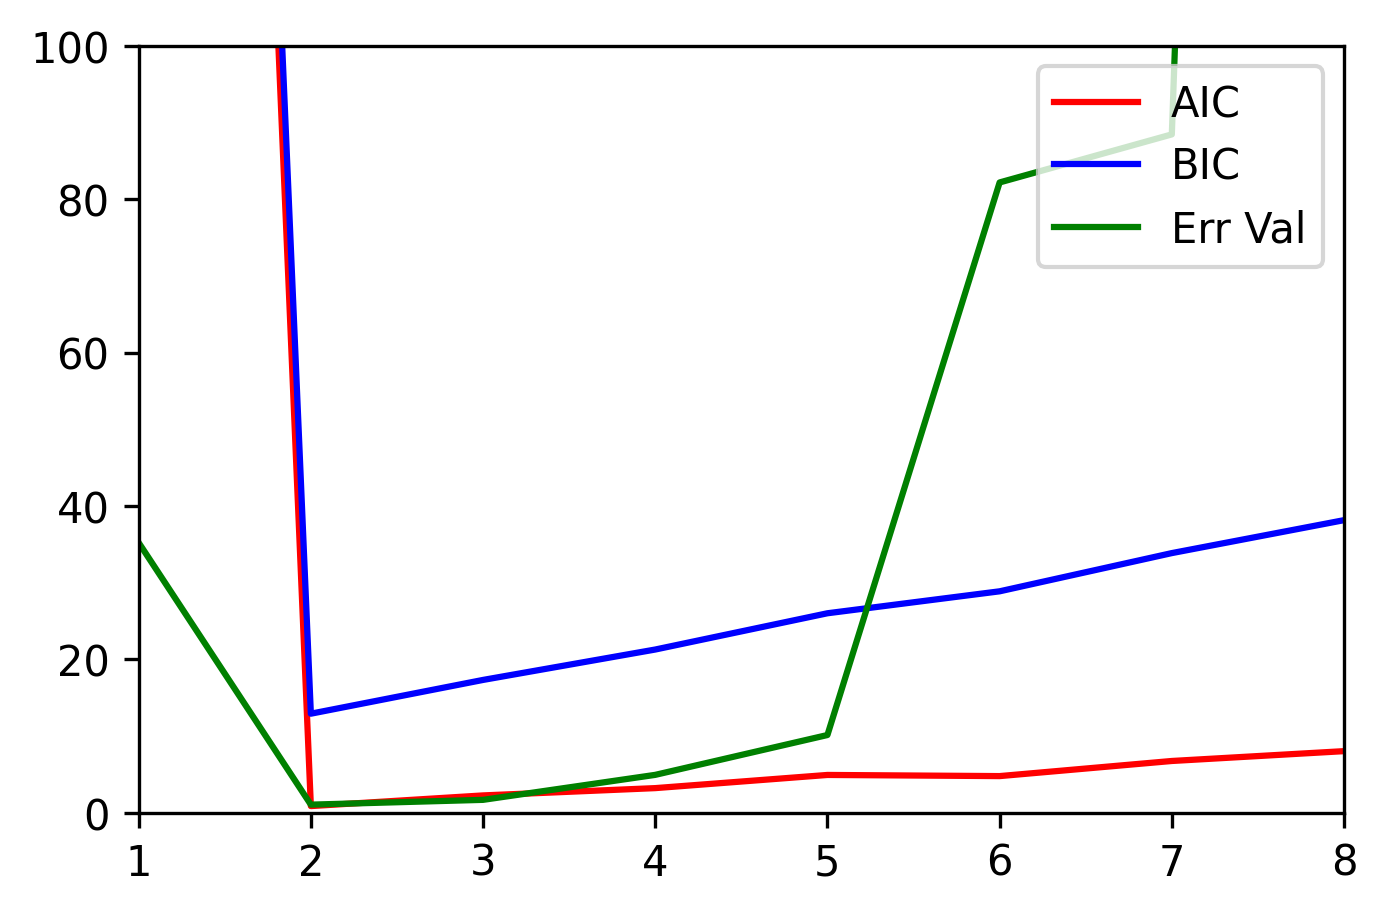

In [ ]:
import numpy as np
np.random.seed(20)

from sklearn.metrics import mean_squared_error, mean_absolute_error


m = 150
X = 10 * np.random.rand(m, 1) - 5
X_new=np.linspace(-4, 4, 150).reshape(150, 1)
y = 0.8 * X**2 - X - 10 + np.random.randn(m, 1)*1

x_test = 20 * np.random.rand(m, 1) - 10
y_test = 0.8 * x_test**2 - x_test - 10 + np.random.randn(m, 1)*1

X_new=np.linspace(-4, 4, 150).reshape(150, 1)
X_new_test=np.linspace(-15, 25, 150).reshape(150, 1)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

fs=(cm2inch(12,8))
fig, ax=plt.subplots(figsize=fs, dpi=DPI, nrows=1, ncols=1, tight_layout=True)
#ax.plot(X, y, "b.", linewidth=3)
plt.axis([1, 8, 0, 100])

def AIC(mse, n):
  return m*np.log(mse)+2*(n+2)

def BIC(mse, n):
  return m*np.log(mse)+(n+2)*np.log(m)

bic = []
aic = []
val = []
train = []

for style, width, degree in (("black", 1, 1),  ("b", 1.5, 2),  ("g", 1.5, 3),  ("g", 1.5, 4), ("g", 1.5, 5),  ("g", 1.5, 6), ("g", 1.5, 7), ("r", 1.5, 8)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", poly_features),
            ("std_scaler", std_scaler),
            ("reg", reg),
        ])
    polynomial_regression.fit(X, y)    
    #print(polynomial_regression.score(X, y))    
    y_new = polynomial_regression.predict(X_new) 
    y_point = polynomial_regression.predict(X)
    y_point_test = polynomial_regression.predict(x_test)
    y_new_test = polynomial_regression.predict(X_new_test)
    print('Grado polinomio ' + str(degree))
    print('MSE addestramento e validazione')
    print(mean_squared_error(y_point, y),mean_squared_error(y_point_test, y_test))
    train.append(mean_squared_error(y_point, y)**0.5)
    val.append(mean_squared_error(y_point_test, y_test)**0.5)
    print('AIC e BIC')
    print(AIC(mean_squared_error(y_point, y), degree), BIC(mean_squared_error(y_point, y), degree)) 
    aic.append(AIC(mean_squared_error(y_point, y), degree)) 
    bic.append(BIC(mean_squared_error(y_point, y), degree))     
    #ax.plot(X_new, y_new, style, linewidth=width)
    #ax.plot(X_new, y_new_test, style, linewidth=width)

ax_x =[1,2,3,4,5,6,7,8]

ax.plot(ax_x, aic, 'r-', linewidth= 1.5, label = "AIC")
ax.plot(ax_x, bic, 'b-', linewidth= 1.5, label = 'BIC')
ax.plot(ax_x, val, 'g-', linewidth= 1.5, label = "Err Val")
ax.legend(loc="upper right")
#ax.plot(ax_x, train, 'k-', linewidth= 1.5)
fig.savefig('5.2.png')
plt.show()

In [ ]:
!git clone https://github.com/lightonai/double-descent-curve.git

In [ ]:
#!ls
%cd double-descent-curve
!python ddc_ridgeclassifier2.py -n_subset 2000 -n_trials 2 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

def sorting(a, b, d, e):
    c = list()
    for i in range(len(a)): 
        c.append([a[i], b[i], d[i], e[i]])
    c = sorted(c)
    a, b, d, e = list(), list(), list(), list()
    for i in range(len(c)): 
        a.append(c[i][0])
        b.append(c[i][1])
        d.append(c[i][2])
        e.append(c[i][3])
    return a, b, d, e

!ls

d = pickle.load(open('synthetic_opu_1.0k_samples.pkl', 'rb'))
d.keys()
ns1 = list(d.keys())

def data_taker(ns, d):

    train_mean, train_plus, train_minus = [], [], []
    test_mean, test_plus, test_minus = [], [], []
    for n in ns:
        train = d[n][0.0]['train']
        train_mu = np.mean(train)
        train_std = np.std(train)
        train_mean.append(train_mu)
        train_plus.append(train_mu + train_std)
        train_minus.append(train_mu - train_std)

        test = d[n][0.0]['test']
        test_mu = np.mean(test)
        test_std = np.std(test)
        test_mean.append(test_mu)
        test_plus.append(test_mu + test_std)
        test_minus.append(test_mu - test_std)

    x = ns 
    _, train_mean, train_plus, train_minus = sorting(x, train_mean, train_plus, train_minus)
    ns, test_mean, test_plus, test_minus = sorting(x, test_mean, test_plus, test_minus)
    
    return ns, train_mean, train_plus, train_minus, test_mean, test_plus, test_minus

def plotter(ns, train_mean, train_plus, train_minus, test_mean, test_plus, test_minus, label1, label2):
    ax.plot(ns, 1-np.asarray(train_mean), marker="o", color = 'b',  label=label1, linewidth=0.8, markersize=2)
    ax.plot(ns, 1-np.asarray(test_mean), marker="o", color = 'g', label=label2, linewidth=0.8, markersize=2)
    #plt.yticks(np.arange(0, 11)/10)
    plt.xticks([], [])

In [ ]:
fs=(cm2inch(12,8))
fig, ax=plt.subplots(figsize=fs, dpi=DPI, nrows=1, ncols=1, tight_layout=True)

d = pickle.load(open('synthetic_opu_1.0k_samples.pkl', 'rb')) 
d.keys()
ns = list(d.keys())
plotter(*data_taker(ns, d), 'Training error', 'Test error')

plt.xlabel('Complessità', fontsize='10')
plt.ylabel('Errore', fontsize='10')
#plt.title('MNIST, subset of 10000 samples', fontsize='10')
ax.grid()
ax.legend(fontsize='10')

fig.savefig('5.2.png')
plt.show()

%cd..

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
X, X_test, y, y_test = train_test_split(iris.data, iris.target, test_size=0.20, random_state=4)
parameters = {'C':[10, 100], 'gamma': [0.0001, 0.01]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv = 5)
clf.fit(X, y)
print(clf.best_params_)
print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['std_test_score'])

#Addestriamo nuovamente la svm con C=300 e gamma = 0.01
from sklearn.metrics import accuracy_score as ac

svc = svm.SVC(C=300, gamma=0.01)
svc.fit(X,y)

test_preds = svc.predict(X_test)
print(ac(test_preds, y_test))

{'C': 100, 'gamma': 0.01}
[0.375      0.975      0.91666667 0.98333333]
[0.         0.03333333 0.05892557 0.03333333]
0.9666666666666667


6.197935874516684
4.987883729114142


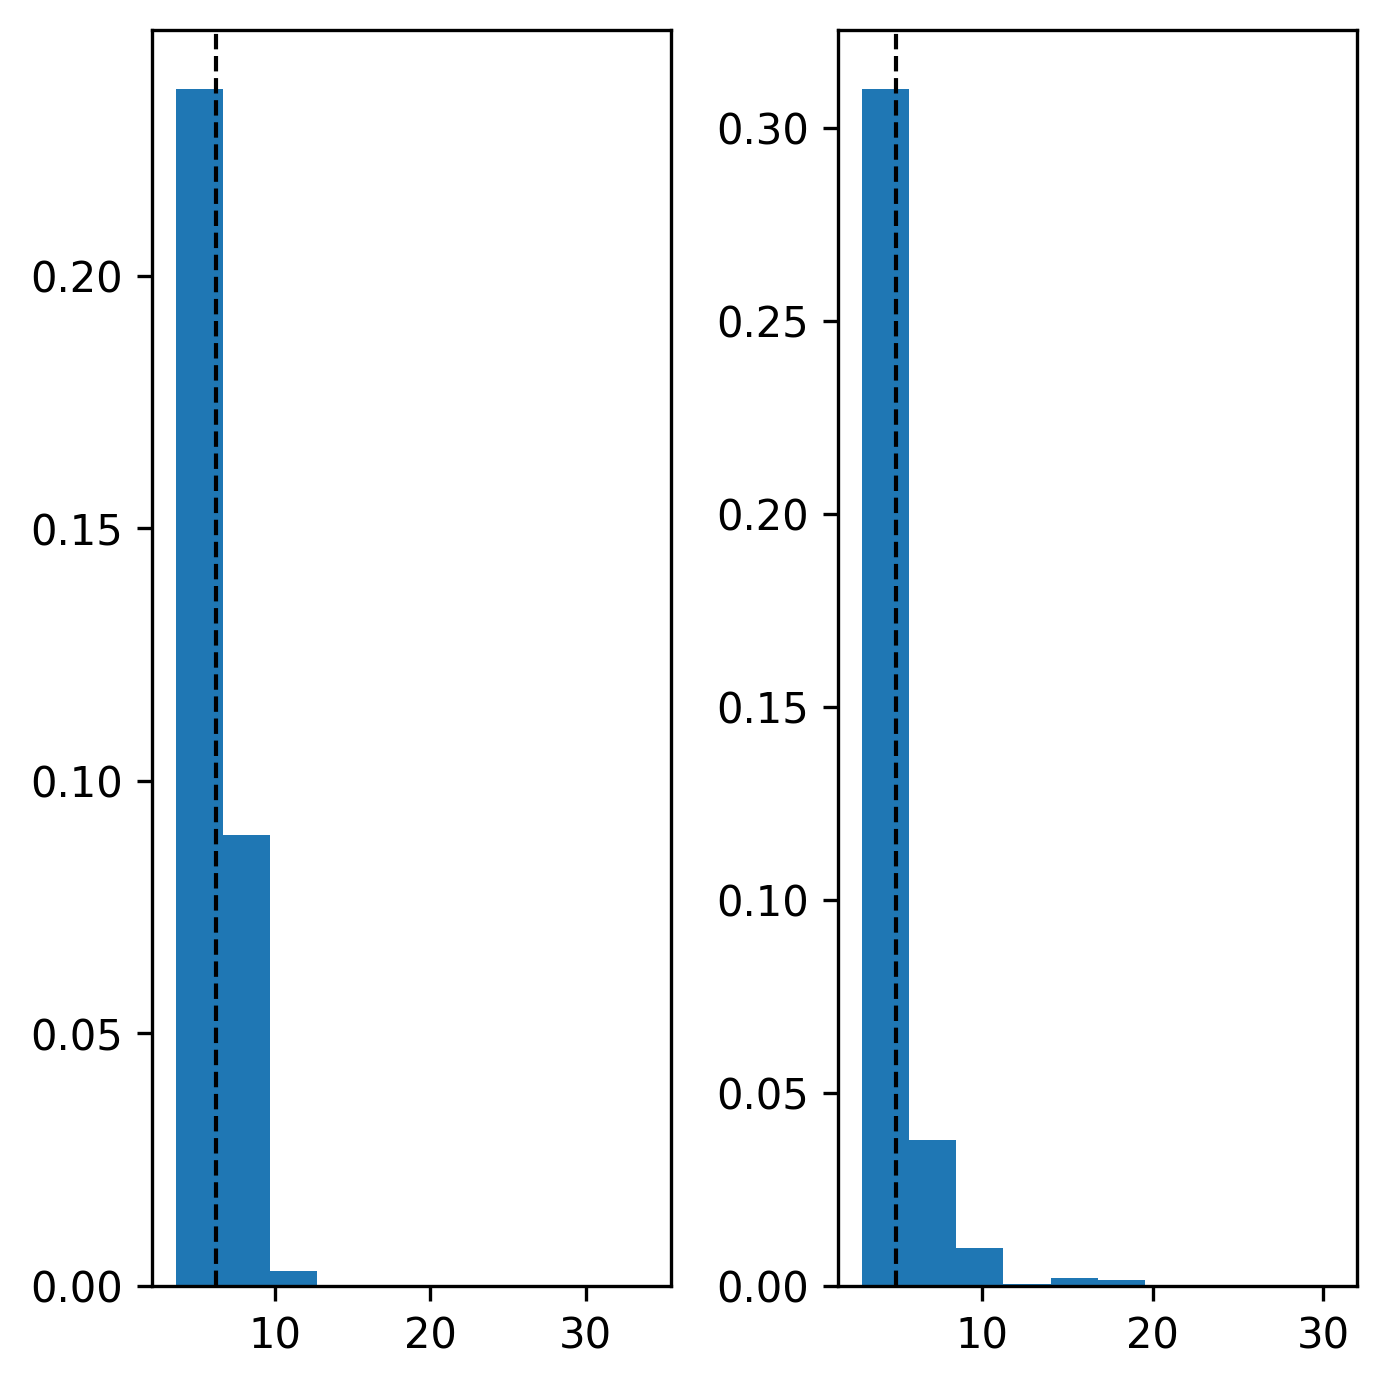

In [ ]:
import numpy as np

def pareto(alpha=1.2, s = 100000):
  p = 1/((np.random.uniform(size=s)**(1/alpha)))
  return p

def get_alpha(samples):
  return len(samples)/(np.sum(np.log(samples)))

def get_mean(alpha): 
  if alpha < 1: alpha = 1.005 
  return alpha/(alpha-1)

sample = pareto()
mle = []
emp = []
alphas = []
for j in range(100000):  
    p = np.random.choice(sample, size = 1000)  
    a = get_alpha(p)
    mle.append(get_mean(a))
    emp.append(np.mean(p))

fs=(cm2inch(12,12))
fig, ax=plt.subplots(figsize=fs, dpi=DPI, nrows=1, ncols=2, tight_layout=True)
ax[0].hist(mle, density = True)
m_mle = np.mean(mle)
print(m_mle)
ax[0].axvline(m_mle, color='k', linestyle='dashed', linewidth=1)
ax[1].hist(emp, density = True)
m_emp = np.mean(emp)
ax[1].axvline(m_emp, color='k', linestyle='dashed', linewidth=1)
print(m_emp)
fig.savefig('5.5.png')
